In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns
import time
import numpy as np
from matplotlib import cm
from numpy.linalg import pinv
from sklearn.datasets import load_boston

In [2]:
Boston = load_boston()
print(Boston.keys())
# print(Boston.filename)
boston = pd.DataFrame(data=Boston.data, columns=[Boston.feature_names])

boston["target"] = Boston.target
display(boston.head(3))
print(boston.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


(506, 14)


# Normalization of DataFrame

In [3]:
def normalization(x):
    maximum = np.max(x)
    minimum = np.min(x)
    avg = np.mean(x)
    normality = (x-avg)/(maximum-minimum)
    return normality
#   

In [4]:
# As for the dataframe, default is deepcopy but for the list is different
data = boston.copy()
data = data.apply(normalization, axis=0)
print(data.shape)

# Insert X0 Column
#X_New = np.array([np.ones(len(x)), x.flatten()]).T
# x = np.vstack((np.ones(len(x)),x)).T
data.insert(0,"X0",1)
print(data.shape)

(506, 14)
(506, 15)


In [5]:
data.head(2)

,X0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,1,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729


In [6]:
data.iloc[:,8]
data.columns[8][0]

'DIS'

# Prepare the Data (X and Y) and X0

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
## We consider feature for one dimension
x= X[:,8]
x.shape

(506,)

In [8]:
# Add one to the DataFrame as X0
x = np.vstack((np.ones(len(x)),x)).T
print(x.shape)

(506, 2)


In [9]:
theta = np.zeros((x.shape[1],1))
print(theta.shape)
y = y.reshape(-1,1)

(2, 1)


# Defined y_predict and cost in the vectorized way

In [10]:
## Initialize theta
start_time = time.time()
theta = np.zeros((x.shape[1],1))
def h_theta(x,theta):
    return np.dot(x,theta)
print(h_theta(x,theta).shape)
print(time.time()-start_time)

(506, 1)
0.0004832744598388672


$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(\theta_1 x_i  - y_i)^2 $$

In [11]:
(h_theta(x,theta)-y).shape

(506, 1)

In [12]:
%%time
def mse_vec(x,y,theta):
#     J_vec = np.dot((np.dot(theta.T,x)-y).T,(np.dot(theta,x)-y))
    J = np.dot((h_theta(x,theta)-y).T, (h_theta(x,theta)-y))
    return 1/2*J[0][0]

mse_vec(x,y,theta)    

CPU times: user 88 µs, sys: 31 µs, total: 119 µs
Wall time: 107 µs


10.547233435807351

In [14]:
h_theta(x,theta).shape

(506, 1)

# Found the best theta through the Gradient Descent in the vectorization

In [15]:
alpha = 0.0005
iteration = 1000
m = x.shape[0]
n = x.shape[1]
def gradient_descent_uni(theta, x, y, alpha=alpha, iteration=iteration):
    J_list = []
    cost_hist = np.zeros((iteration,1))
    theta = np.zeros((n,1),dtype = float) 

    for i in range(iteration):
        Grad = np.dot(x.T,(h_theta(x,theta)-y))
#         grad = (1/m) * ((x.T)@(x@theta-y))
        theta = theta - (alpha/m)*Grad
        cost_hist[i] = mse_vec(x,y,theta)##array([[10.54720933],[10.54718522]]

        J_list.append(mse_vec(x,y,theta))
    
    return J_list, theta
    
J_list, newtheta = gradient_descent_uni(theta, x, y, alpha, iteration=1000)
J_list

[10.54720932762626,
 10.547185220327352,
 10.547161113910592,
 10.547137008375952,
 10.547112903723404,
 10.547088799952894,
 10.547064697064412,
 10.547040595057915,
 10.547016493933379,
 10.546992393690758,
 10.546968294330034,
 10.546944195851163,
 10.546920098254125,
 10.546896001538876,
 10.546871905705396,
 10.54684781075364,
 10.546823716683582,
 10.54679962349519,
 10.54677553118843,
 10.546751439763273,
 10.546727349219678,
 10.546703259557624,
 10.546679170777077,
 10.546655082877995,
 10.546630995860358,
 10.546606909724128,
 10.546582824469263,
 10.546558740095755,
 10.546534656603548,
 10.546510573992625,
 10.546486492262941,
 10.546462411414472,
 10.546438331447186,
 10.546414252361052,
 10.546390174156032,
 10.546366096832095,
 10.546342020389213,
 10.54631794482735,
 10.546293870146476,
 10.546269796346557,
 10.546245723427564,
 10.546221651389455,
 10.546197580232207,
 10.546173509955795,
 10.546149440560173,
 10.546125372045308,
 10.546101304411174,
 10.54607723765774

In [16]:
x_test = np.array([1650.0, 3])
#         # exclude intercept units when normalizing
x_test = (x_test - np.mean(x_test)) / np.std(x_test)
newtheta.T@x_test

array([-0.0048365])

## Plot the cost function versus iteration and Found the best value for the alpha (learning rate) through diefferent plots of cost
#### What is the bes alpha(learning rate)? We gave different values (third order coefficients ) of alpha and detected the best value of alpha through the cost plot

In [17]:
choose_alpha = .00001
alpha_range=[]
while choose_alpha<100000:
    alpha_range.append(choose_alpha)
    al = choose_alpha*3
    choose_alpha = round(al,5)
print(len(alpha_range),alpha_range)
 

21 [1e-05, 3e-05, 9e-05, 0.00027, 0.00081, 0.00243, 0.00729, 0.02187, 0.06561, 0.19683, 0.59049, 1.77147, 5.31441, 15.94323, 47.82969, 143.48907, 430.46721, 1291.40163, 3874.20489, 11622.61467, 34867.84401]


### Plotting to detect the best values of alpha

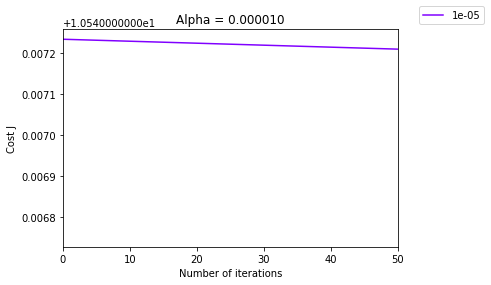

Predicted price = -0.00


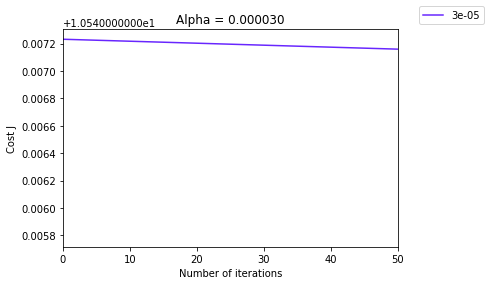

Predicted price = -0.00


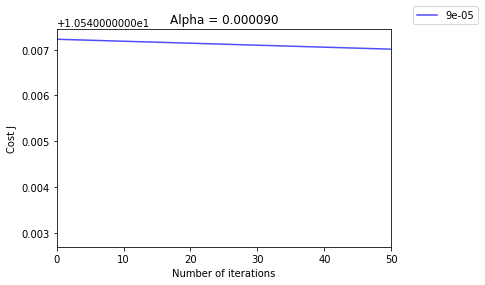

Predicted price = -0.00


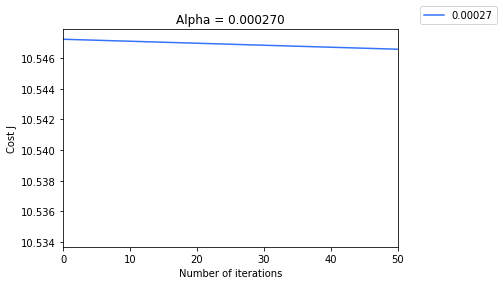

Predicted price = -0.00


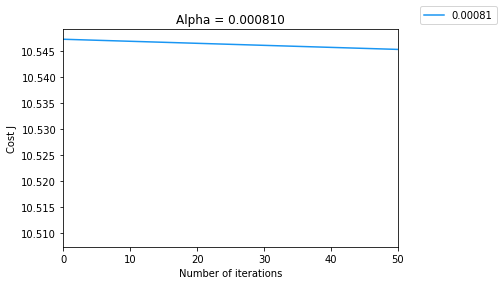

Predicted price = -0.01


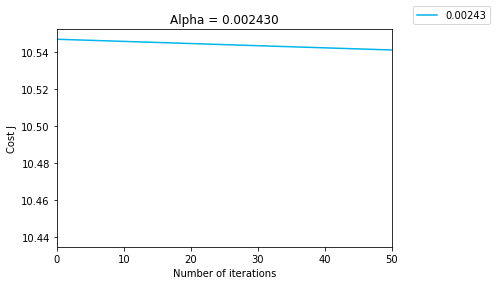

Predicted price = -0.02


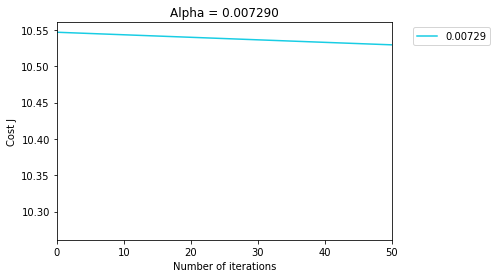

Predicted price = -0.06


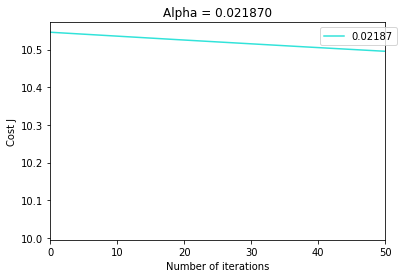

Predicted price = -0.15


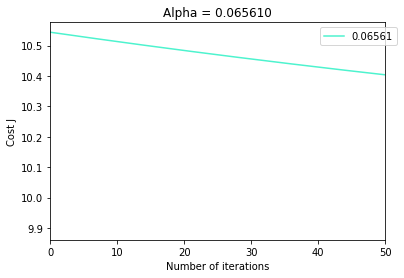

Predicted price = -0.24


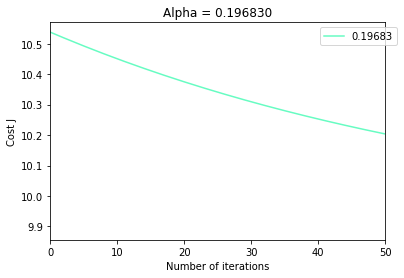

Predicted price = -0.27


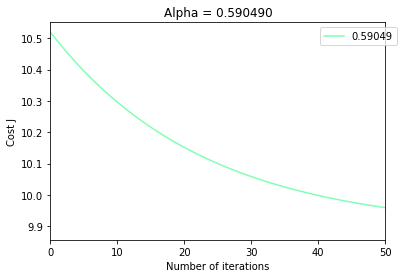

Predicted price = -0.27


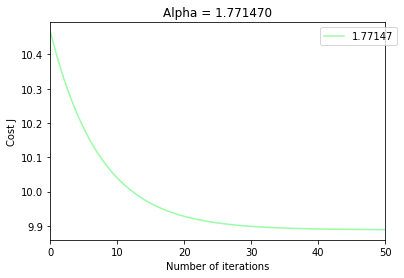

Predicted price = -0.27


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


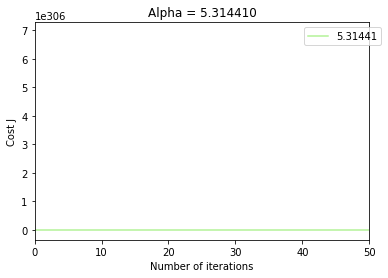

Predicted price = nan


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


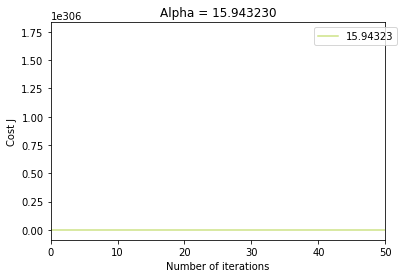

Predicted price = nan


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


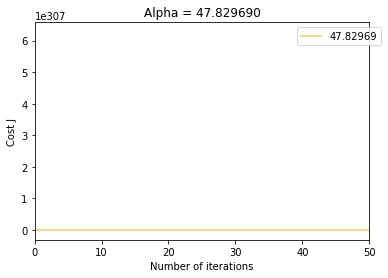

Predicted price = nan


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


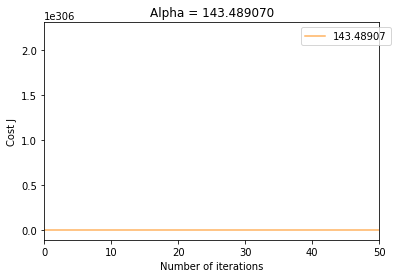

Predicted price = nan


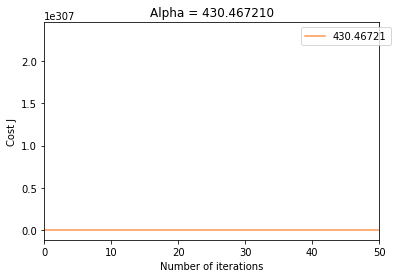

Predicted price = nan


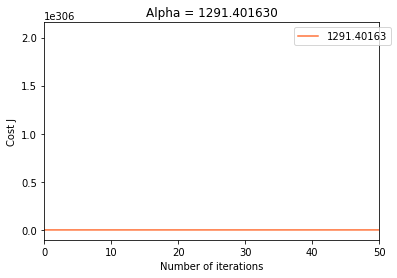

Predicted price = nan


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


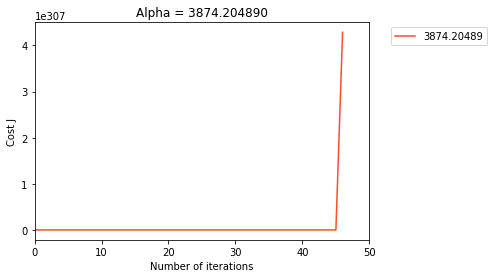

Predicted price = nan


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: overflow encountered in multiply
  theta = theta - (alpha/m)*Grad
<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


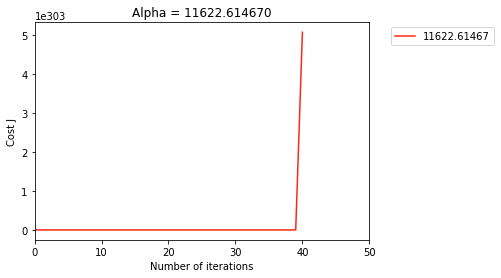

Predicted price = nan


<ipython-input-15-f4e6269a618b>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m)*Grad


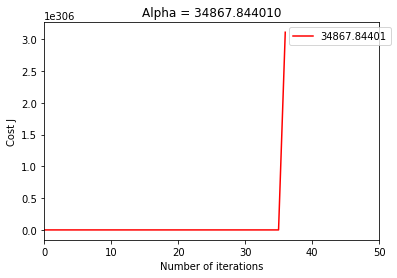

Predicted price = nan


In [18]:
color=cm.rainbow(np.linspace(0,1,n))
def plot_best_alpha():
#     
    alphas = alpha_range
    colours=cm.rainbow(np.linspace(0,1,21))
#     colours = "rgbcymyk" 
    
    for alpha, c in zip(alphas,colours):
        # plot cost versus iteration
        theta = np.zeros((2, 1))
        J_list, newtheta = gradient_descent_uni(theta, x, y, alpha, iteration=1000)
        
        plt.plot(np.arange(1000),J_list, label = alpha, color = c)
        plt.title("Alpha = %f" % (alpha))
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost J')
        plt.xlim([0, 50])
        plt.legend(bbox_to_anchor=(1.05, 1.0))
        plt.show()

#         ## predict price for a 1650 sq feet 3 bedroom house
        x_test = np.array([1650.0, 2])
#         # exclude intercept units when normalizing
        x_test = (x_test - np.mean(x_test)) / np.std(x_test)
        prediction = newtheta.T@x_test
        print('Predicted price = %.2f' % prediction[0])
plot_best_alpha()

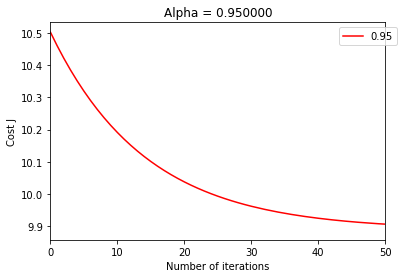

Predicted price = -0.27


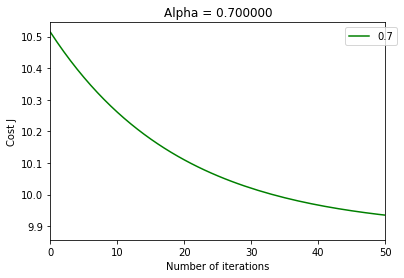

Predicted price = -0.27


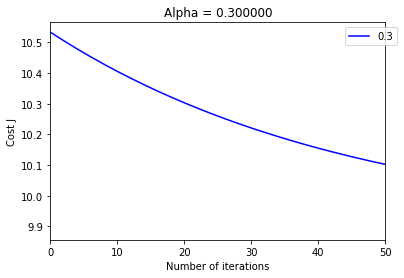

Predicted price = -0.27


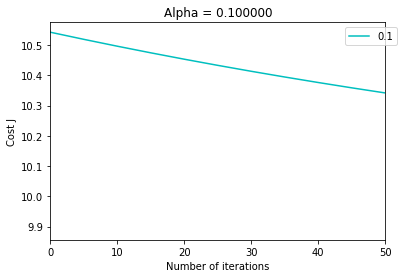

Predicted price = -0.26


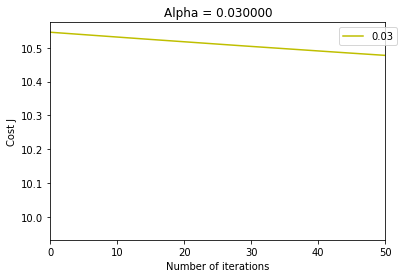

Predicted price = -0.18


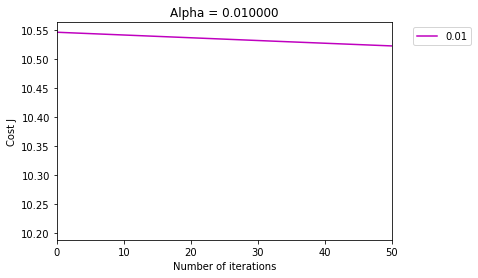

Predicted price = -0.08


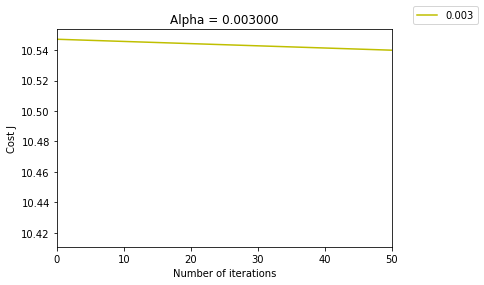

Predicted price = -0.03


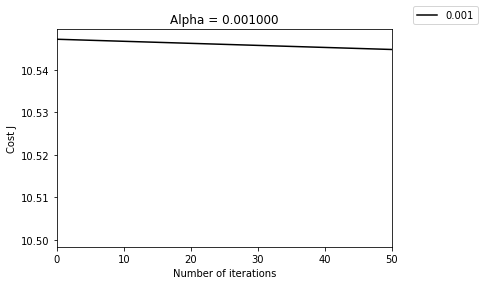

Predicted price = -0.01


In [19]:
def alpha_plotting():
#     
    alphas = [0.95, 0.7, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
    colours = "rgbcymyk" 
    
    for alpha, c in zip(alphas,colours):
        # plot cost versus iteration
        theta = np.zeros((2, 1))
        J_list, newtheta = gradient_descent_uni(theta, x, y, alpha, iteration=1000)
        
        plt.plot(np.arange(1000),J_list, label = alpha, color = c)
        plt.title("Alpha = %f" % (alpha))
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost J')
        plt.xlim([0, 50])
        plt.legend(bbox_to_anchor=(1.05, 1.0))
        plt.show()

#         ## predict price for a 1650 sq feet 3 bedroom house
        x_test = np.array([1650.0, 2])
#         # exclude intercept units when normalizing
        x_test = (x_test - np.mean(x_test)) / np.std(x_test)
        prediction = newtheta.T@x_test
        print('Predicted price = %.2f' % prediction[0])
alpha_plotting()

#### From the above plots, we will see that for alpha = 0.7 has the best cost plot. We will see that cost plot for alpha=0.7 is descending.

# Found the theta through Normal Equation in vectorization 

In [20]:
def normal_equation(X, y):
    theta = np.linalg.pinv(X.T@X)@(X.T)@y
    return theta
    raise NotImplementedError('You should implement normal_equation function.')
theta = normal_equation(x, y)

In [21]:
x_test = np.array([1650.0, 2.0])
prediction = x_test @ theta
print('Predicted price = %.2f' % prediction[0])

Predicted price = 0.53


## Plot the 3d cost function when Cost is on Z axes and theta0 and theta1 are in X and Y axes 

<ipython-input-22-3b44a4dcddb7>:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


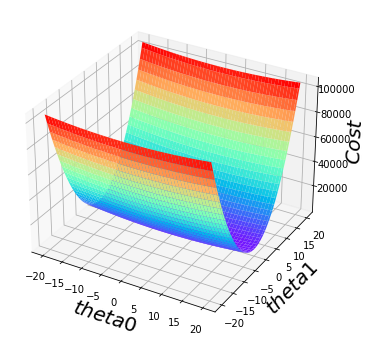

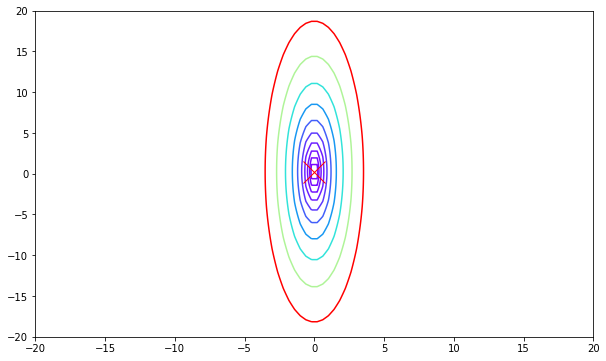

In [22]:
def part1_2():
    # load and prepare data

    # compute cost function for a range of different values for parameters
    theta0_vals = np.linspace(-20, 20, 100)
    theta1_vals = np.linspace(-20, 20, 100)

    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)), dtype=np.float64)
    for i, v0 in enumerate(theta0_vals):
        for j, v1 in enumerate(theta1_vals):
            theta = np.array((theta0_vals[i], theta1_vals[j])).reshape(2, 1)
            J_vals[i, j] = mse_vec(x, y, theta)

    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

    # plot cost function
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca(projection="3d")
    ax.plot_surface(T0, T1, J_vals, cmap=plt.cm.rainbow)
    ax.set_xlabel("$theta0$", fontsize=20, rotation=150)
    ax.set_ylabel("$theta1$",fontsize=20, rotation=150)
    ax.set_zlabel("$Cost$", fontsize=20)
    plt.show()

    J_list, newtheta = gradient_descent_uni(theta, x, y, alpha=0.7, iteration=1500)
    fig = plt.figure(figsize=(10, 6))
    plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3.5, 25), cmap=plt.cm.rainbow)
    plt.plot(newtheta[0], newtheta[1], "rx", markersize=22)
    plt.show()

part1_2()

In [23]:
h_theta(x,newtheta).shape
J_list, newtheta = gradient_descent_uni(theta, x, y, alpha=0.7, iteration=1500)

In [24]:
from matplotlib import animation, rc
rc('animation', html='html5')
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(x[:,1:2], y, s=30, marker='x')


y_pred = h_theta(x,newtheta)
line, = plt.plot(x[:,1:2], y_pred, 'k');
plt.close()


t0,t1 = newtheta[0][0],newtheta[1][0]
def animate(i):
    global t0,t1 
    J_list, newtheta = gradient_descent_uni(theta, x, y, alpha=0.7, iteration=1500)
    line.set_ydata(h_theta(x,newtheta))
    for i in range(100): 
#         J_list, newtheta = gradient_descent_uni(theta, x, y, alpha=0.7, iteration=1500)
        t0,t1 = newtheta[0][0],newtheta[1][0]
    return line

anim = animation.FuncAnimation(fig, animate, np.arange(0, 21), interval=200, repeat_delay=1000)

In [25]:
anim

# Unvectorized Approach
### First: Prediction

In [63]:
theta = np.zeros((2,1))
theta_0, theta_1 = theta[0], theta[1]
# theta_0, theta_1 = theta[0], theta[1]
def h(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def y_prediction(theta_0,theta_1,x):
    return theta_0 + x * theta_1 


## Cost and Normlization

In [64]:
def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true)**2).mean()

mse(h(theta_0, theta_1, x),y)

0.020844334853374204

In [65]:
def mse_pred(theta_0,theta_1,X=X,y=y):
    y_pred = h(theta_0,theta_1,x)
    cost_sum=0
    cost_sum1=0
    cost_sum2=0
    for i in range (m):
        cost_sum1 += (2/m)*(np.square(y_pred[i]) - y[i])
        cost_sum2 += (2/m)*(np.square((theta_0 + theta_1 * x[i]) - y[i]))  
    return cost_sum2
mse_pred(theta_0,theta_1,X=x,y=y)

array([0.08337734, 0.08337734])

In [66]:
xn = (x-x.mean())/(x.std())
print(xn.shape)

(506, 2)


In [67]:
def update_step(theta_0,theta_1,alpha):
#     global theta_0, theta_1, costs
    
    # predict 
    y_pred = h(theta_0, theta_1, xn)
    costs = mse(y_pred, y)
    
    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0
    
    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()
    
    return theta_0,theta_1,costs

update_step(theta_0,theta_1,alpha)

(array([-5.44140929e-20]), array([4.71147045e-06]), 0.020844334853374204)

In [68]:
theta_0 = np.random.randn()
theta_1 = np.random.randn()
print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))
cost=0

def update_step(x,y,theta_0,theta_1,lr,iteration):
    cost_i=0
    cost_history=[]
#     global theta_0,theta_1,cost
    for i in range(iteration):
        theta_0_ = np.random.randn()
        theta_1_ = np.random.randn()
        cost_i=0
        cost_history=[]
        for j in range(m):
            dtheta_0 = -(1/m)* (y_prediction(theta_0,theta_1,x))
            dtheta_1 = -(1/m)* (y_prediction(theta_0,theta_1,x))*x
#         cost_i = mse_pred(theta_0,theta_1,X=x,y=y)   
        theta_0_ -= (lr)*(dtheta_0)
        theta_1_ -= (lr)*(dtheta_1)
        cost_i = mse_pred(theta_0_,theta_1_,X=x,y=y) 
        cost_history.append(cost_i)
#     print(cost)
    return theta_0_,theta_1_,cost_history
theta_0_,theta_1_,cost_history = update_step(x,y,theta_0,theta_1,lr=1.7,iteration=1500)
cost_history

Initial guess:
 theta_0 = 1.2502
 theta_1 = -0.6204


[array([[6.67897916, 4.40402162],
        [6.67897916, 4.40496833],
        [6.67897916, 4.40496833],
        ...,
        [6.67897916, 4.40195535],
        [6.67897916, 4.40219269],
        [6.67897916, 4.40231721]])]

(1012,)


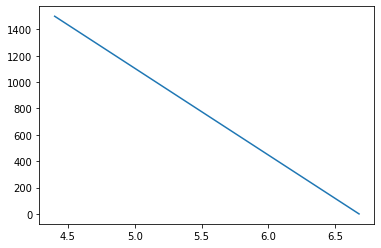

In [69]:
plotting = cost_history[0].reshape(-1,)
print(plotting.shape)
plt.plot(np.linspace(plotting.max(), plotting.min(),1500),np.arange(1500));

## Problem, why the following plot?

(1012,)


array([6.67897916, 4.40402162, 6.67897916, ..., 4.40219269, 6.67897916,
       4.40231721])

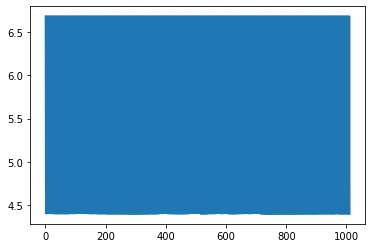

In [70]:
plotting = cost_history[0].reshape(-1,)
print(plotting.shape)
plt.plot(np.arange(1012), plotting)

cost_history[0].ravel()

In [86]:
def loop_gradient_descent_unvec(x,y,theta,lr,iterations):
    #Initialize theta
    theta = np.zeros((2,1),dtype=float) ##  np.array([[0],[0]])
#     theta = np.zeros(2,dtype=float)
#     print(theta[0].shape)
    #Variables
    Grad_0 = Grad_1 = 0
    
    t0 = np.zeros(1)
    t1 = np.zeros(1)
    y_pred = y_prediction(theta[0],theta[1],x)
    
    start_time = time.time()
    # Find gradient 0
    for i in range(iterations):
        for j in range(m):
            Grad_0 = Grad_0 + (y_pred[j]) - (y[j])
            
        # Find gradient 1 
        for k in range(m):
            Grad_1 = Grad_1 + (y_pred[k]) - (y[k]) * (x[k])
            
        t0 = theta[0] - (lr*(1/m) * Grad_0)
        t1 = theta[1] - (lr*(1/m) * Grad_1)
        theta = np.vstack((t0,t1))
#         print(t0.shape,t1.shape)
        theta[0] = t0
        theta[1] = t1
        Grad_0 = Grad_1 = 0  

    print("model parameters are:",(theta[0], theta[1]), sep = "\n")
#     print(f"time taken for gradient descent parametes are: {round(time.time()-start_time,4)}")
    return theta[0], theta[1]

loop_gradient_descent_unvec(x,y,theta,lr=0.7,iterations=1000)

model parameters are:
(array([-9.34967957e-14, -9.34967957e-14]), array([-9.34967957e-14,  6.83316627e+00]))


(-9.349679572498079e-14, -9.349679572498079e-14)

In [77]:
theta0, theta1 = loop_gradient_descent_unvec(x,y,theta,lr=0.7,iterations=1500)

model parameters are:
(array([-1.40245194e-13, -1.40245194e-13]), array([-1.40245194e-13,  1.02497494e+01]))


In [84]:
x[:,:1].shape
# theta1.shape
theta0 + x * theta1

array([[-2.80490387e-13,  2.74917344e-01],
       [-2.80490387e-13,  1.09242548e+00],
       [-2.80490387e-13,  1.09242548e+00],
       ...,
       [-2.80490387e-13, -1.51696430e+00],
       [-2.80490387e-13, -1.31060664e+00],
       [-2.80490387e-13, -1.20239470e+00]])

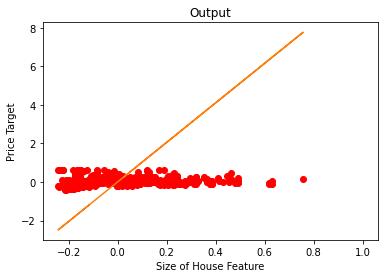

In [87]:
def y_prediction(theta_0,theta_1,x):
    return theta_0 + x * theta_1
y_pred_unvec = y_prediction(theta0,theta1,x)

plt.scatter(x[:,1],y,c = 'red')
plt.plot(x,y_pred_unvec)
plt.xlabel('Size of House Feature')
plt.ylabel('Price Target')
plt.title('Output');

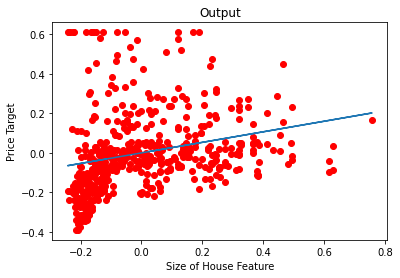

In [38]:
plt.scatter(x[:,1],y,c = 'red')
plt.plot(x[:,1],y_pred)
plt.xlabel('Size of House Feature')
plt.ylabel('Price Target')
plt.title('Output');